In [0]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [0]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [0]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

In [0]:
df = pd.read_csv("drive/My Drive/super_clean_train_10.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            49972 non-null  int64 
 1   Unnamed: 0.1          49972 non-null  int64 
 2   Headline              49972 non-null  object
 3   Body ID               49972 non-null  int64 
 4   Stance                49972 non-null  object
 5   articleBody           49972 non-null  object
 6   Headline_clean        49972 non-null  object
 7   articleBody_clean     49972 non-null  object
 8   selftext_lemma        49972 non-null  object
 9   selftext_nouns        49972 non-null  object
 10  selftext_adjectives   48988 non-null  object
 11  selftext_verbs        49904 non-null  object
 12  selftext_nav          49972 non-null  object
 13  no_tokens             49972 non-null  int64 
 14  selftext_lemma1       49972 non-null  object
 15  selftext_nouns1       49963 non-null

In [0]:
# select a sample of some data frame columns
df[[ 'Body ID','Headline_clean', 'articleBody_clean', 'Stance']].sample(2, random_state=42)

,Body ID,Headline_clean,articleBody_clean,Stance
17851,1522,photo slain leader reported doctored,iraqinews com thousands social media users distributing unverified photo claims body isis leader abu bakr al baghdadi purportedly killed air strikes senior members isis including aide al baghdadi killed air strikes death senior members aide al baghdadi confirmed senior iraqi security official interviewed nbc news thursday strike isis stronghold mosul killed abu hajar al sufi aide abu bakr al baghdadi explosives operative military leader nearby tal afar source said condition anonymity al arabiya cited iraqi defense ministry saying baghdadis aide killed pentagon spokesman col steve warren confirm deaths said isis leaders targeted added isis leaders embedded inside troop formations likely killed u carrying airstrikes north iraq brutal terrorists isis gained ground murderous sweep june number news outlets websites published unverified photo news death al baghdadi airstrikes iraqinews com unable verify photo claim al baghdadi killed,discuss
6400,2177,report radically redesigned inch macbook air coming,monday morning report surfaced claiming comcast discouraging customers tor browser browsing program designed allow users surf internet greater anonymity browsers mondays report repackaged number sites stating comcast declared war tor browser report goes suggest comcast contacted users telling risk disconnection continue tor report generated lot clicks totally inaccurate comcast asking customers stop tor browser matter policy tor browser software customers free use xfinity internet service visit website use app forth facts comcast doesnt monitor customers browser software web surfing online history anecdotal chat room evidence described reports accurate respect customer privacy security investigate disclose certain information customer account valid court order appropriate legal process like isps information policies transparency report terminate customers violating copyright alert aka strikes non punitive educational voluntary copyright program read customers use tor time im sure right,unrelated


In [0]:
# length of a dataframe
len(df)

49972

In [0]:
# number of values per column
df.count()

Unnamed: 0              49972
Unnamed: 0.1            49972
Headline                49972
Body ID                 49972
Stance                  49972
articleBody             49972
Headline_clean          49972
articleBody_clean       49972
selftext_lemma          49972
selftext_nouns          49972
selftext_adjectives     48988
selftext_verbs          49904
selftext_nav            49972
no_tokens               49972
selftext_lemma1         49972
selftext_nouns1         49963
selftext_adjectives1    22847
selftext_verbs1         43482
selftext_nav1           49972
no_tokens1              49972
dtype: int64

In [0]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            49972 non-null  int64 
 1   Unnamed: 0.1          49972 non-null  int64 
 2   Headline              49972 non-null  object
 3   Body ID               49972 non-null  int64 
 4   Stance                49972 non-null  object
 5   articleBody           49972 non-null  object
 6   Headline_clean        49972 non-null  object
 7   articleBody_clean     49972 non-null  object
 8   selftext_lemma        49972 non-null  object
 9   selftext_nouns        49972 non-null  object
 10  selftext_adjectives   48988 non-null  object
 11  selftext_verbs        49904 non-null  object
 12  selftext_nav          49972 non-null  object
 13  no_tokens             49972 non-null  int64 
 14  selftext_lemma1       49972 non-null  object
 15  selftext_nouns1       49963 non-null

In [0]:
columns = [col for col in df.columns if not col.startswith('self')]
columns

['Unnamed: 0',
 'Unnamed: 0.1',
 'Headline',
 'Body ID',
 'Stance',
 'articleBody',
 'Headline_clean',
 'articleBody_clean',
 'no_tokens',
 'no_tokens1']

In [0]:
df['Stance'].value_counts()[:10]

unrelated    36545
discuss      8909 
agree        3678 
disagree     840  
Name: Stance, dtype: int64

In [0]:
# create a data frame slice
sub_df = df[df['Stance']=='discuss']
# sample cleaned text and tokens tagged as nouns
sub_df[['articleBody_clean', 'selftext_nouns']].sample(2)

,articleBody_clean,selftext_nouns
26351,nigerias government boko haram agreed ceasefire brings closer release schoolgirls kidnapped north country months ago secret meetings held authorities abuja nigerian capital representatives al qaeda linked militia led temporary agreement lay arms deal includes need rescue captives terrorists including students government girls secondary school chibok said mike omeri anti terrorism spokesman presidents national information centre immediate ceasefire boko haram apparently saying suspend bombing kidnap campaign nigerian army agreeing target suspected militant camps discussions boko harams representatives indicated desire willingness discuss resolve associated issues mr omeri said assured school girls people captivity alive announcement came days protesters marched abuja mark month anniversary girls abduction close teenage girls kidnapped armed gunmen driven school coaches excursion managed escape estimated held captive reportedly nigerias neighbour cameroon military involved ceasefire talks immediate scepticism western diplomat lagos nigerias coastal commercial capital pointed goodluck jonathan president middle campaigning presidential elections year hes tough run boko haram needs boost diplomat said main thing people concerned security score ceasefire great bring girls better weve heard boko haram taking little salt aid groups working secure release schoolgirls welcomed news remained cautious ceasefire incredibly promising arent said hussaini abdu country director actionaid nigeria girl released negotiations continue excited possibility restoring peace country girls remain priority urge government ensure safety guaranteed truce britain nations offered assistance nigerian government military help missing schoolgirls privately western security sector sources country report exasperation coming help slow pace nigerians reactions kidnap crisis girls understood separated groups making armed rescue far complicated dangerous leaving talks likely route release boko haram past insisted release teenagers nigeria freed groups senior commanders captured jail immediate details boko haram ceasefire deal group blamed hundreds killings bomb gun attacks increasingly choosing targets wider area northern nigeria began local militia targeting people broke strict islamic regulations drinking alcohol recently linked al qaedas franchise west africa al qaeda islamic maghreb appears taken far ambitious aims including ridding northern nigeria christians boko harams leader abubakar shekau frequently justifies attacks christians revenge killings muslims nigerias volatile middle belt largely christian south muslim north meet telegraph revealed month international committee red cross involved secret prisoner swap deal ensure schoolgirls return officials geneva based organisation sat talks nigerian government senior boko haram leader held country maximum security prisons red cross officials visited number jails identifying list senior commanders boko haram wants freed exchange hostages kidnapped north east town chibok icrc role talks represented official confirmation nigerian government actively engaged talks boko haram publicly nigeria president goodluck jonathan previously maintained government agree kind negotiations,nigerias government boko haram ceasefire release schoolgirl north country month meeting authority abuja capital representatives al qaeda militia agreement arm deal rescue captive terrorist student government girl school chibok mike omeri anti terrorism spokesman president national information centre immediate ceasefire haram suspend kidnap campaign nigerian army target camp discussion harams representative desire willingness discuss issue mr omeri school girl people captivity announcement day protester abuja mark month anniversary girl abduction girl gunman school coach excursion escape nigerias neighbour cameroon military ceasefire scepticism diplomat lagos nigerias capital goodluck jonathan president mid

In [0]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [0]:
# transform list of documents into a single list of tokens
tokens = sub_df.selftext_nouns.map(my_tokenizer).sum()

In [0]:
print(tokens[:200])

['british', 'rapper', 'father', 'trial', 'manhattan', 'pair', 'embassy', 'bombing', 'journalist', 'james', 'foley', 'friday', 'abdel', 'majed', 'abdel', 'bary', 'photo', 'head', 'brit', 'killer', 'john', 'beatle', 'bary', 'son', 'egyptian', 'trial', 'terror', 'charge', 'bombing', 'kenya', 'tanzania', 'investigation', 'brother', 'british', 'doctor', 'war', 'correspondent', 'gang', 'member', 'islam', 'syria', 'britains', 'telegraph', 'newspaper', 'dozen', 'counterterrorism', 'expert', 'uk', 'day', 'foley', 'killer', 'britains', 'mail', 'hostage', 'isis', 'jihadist', 'beatles', 'british', 'accent', 'crony', 'george', 'ringo', 'bary', 'syria', 'year', 'war', 'skin', 'tone', 'accent', 'john', 'according', 'telegraph', 'jihadist', 'aspiring', 'rapper', 'west', 'london', 'l', 'jinny', 'music', 'bbc', 'radio', 'bary', 'music', 'video', 'youtube', 'song', 'dreamer', 'follower', 'islamic', 'preacher', 'anjem', 'choudary', 'familys', 'plush', 'home', 'maida', 'vale', 'district', 'london', 'year',

In [0]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('video', 11682),
 ('group', 9685),
 ('isis', 9652),
 ('state', 9406),
 ('foley', 7440),
 ('government', 7392),
 ('year', 7021),
 ('syria', 6981),
 ('man', 6738),
 ('report', 6489),
 ('al', 6415),
 ('people', 6302),
 ('iraq', 6072),
 ('time', 5972),
 ('apple', 5804),
 ('u', 5651),
 ('police', 5475),
 ('news', 5454),
 ('official', 5343),
 ('militant', 5199)]

In [0]:
df.Headline_clean.unique()

array(['police mass graves bodies near mexico town students disappeared police clash',
       'hundreds palestinians flee floods gaza israel opens dams',
       'christian bale passes role steve jobs actor reportedly felt right',
       ..., 'discovered new eyewitness account jesus miracles',
       'rumor apple watch feature mb ram gb storage',
       'apple watch takes hours charge delivers notifications wrist'],
      dtype=object)

In [0]:
print([t[0] for t in counter.most_common(200)])

['video', 'group', 'isis', 'state', 'foley', 'government', 'year', 'syria', 'man', 'report', 'al', 'people', 'iraq', 'time', 'apple', 'u', 'police', 'news', 'official', 'militant', 'haram', 'air', 'islamic', 'kim', 'girl', 'source', 'journalist', 'officer', 'border', 'week', 'force', 'security', 'brown', 'day', 'month', 'boko', 'fighter', 'family', 'medium', 'north', 'leader', 'statement', 'friend', 'city', 'obama', 'new', 'attack', 'shot', 'release', 'wilson', 'ebola', 'intelligence', 'country', 'cnn', 'james', 'world', 'president', 'tuesday', 'john', 'post', 'case', 'mosul', 'woman', 'war', 'mr', 'town', 'death', 'member', 'michael', 'jong', 'watch', 'service', 'hostage', 'area', 'monday', 'nigeria', 'life', 'number', 'health', 'story', 'photo', 'site', 'claim', 'information', 'student', 'terrorist', 'press', 'london', 'american', 'emwazi', 'twitter', 'house', 'august', 'korea', 'macbook', 'washington', 'message', 'weapon', 'united', 'soldier', 'office', 'hand', 'expert', 'wednesday'

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

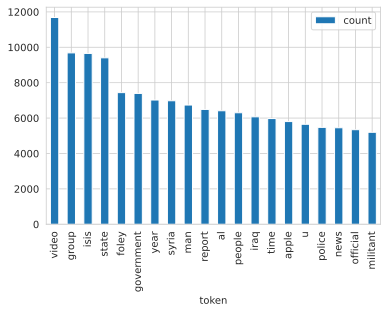

In [0]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

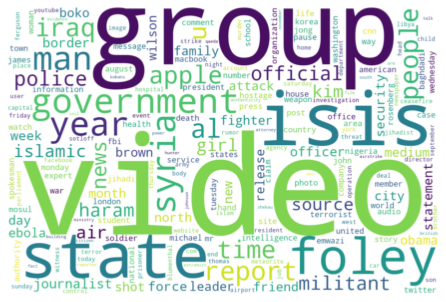

In [0]:
# create wordcloud
wordcloud(counter)

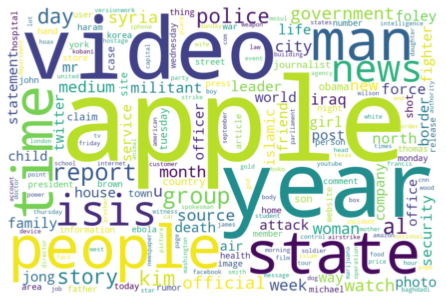

In [0]:
tokens2 = df[df['Stance']=='unrelated'].selftext_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

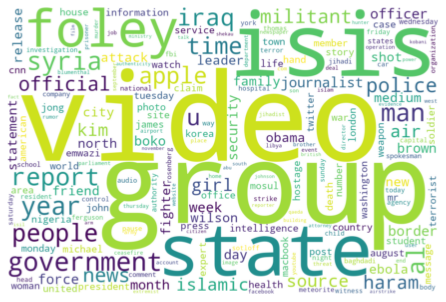

In [0]:
tokens2 = df[df['Stance']=='discuss'].selftext_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

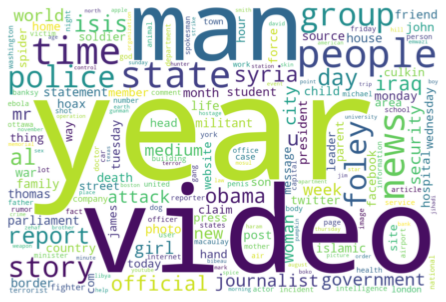

In [0]:
tokens2 = df[df['Stance']=='agree'].selftext_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

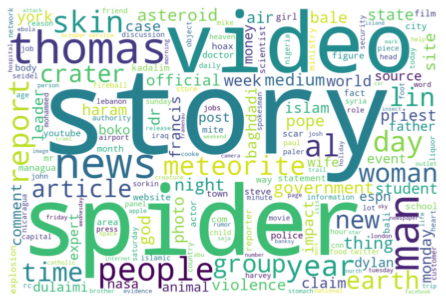

In [0]:
tokens2 = df[df['Stance']=='disagree'].selftext_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

In [0]:
df['no_tokens'] = df.articleBody_clean\
  .map(lambda l: 0 if l==None else len(l.split()))

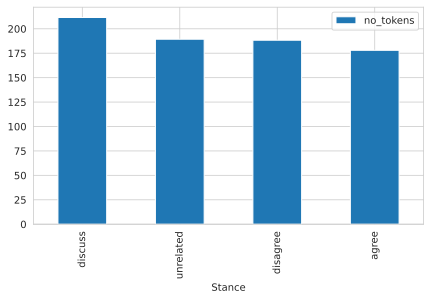

In [0]:
# mean number of tokens by category
df.groupby(['Stance']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [0]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

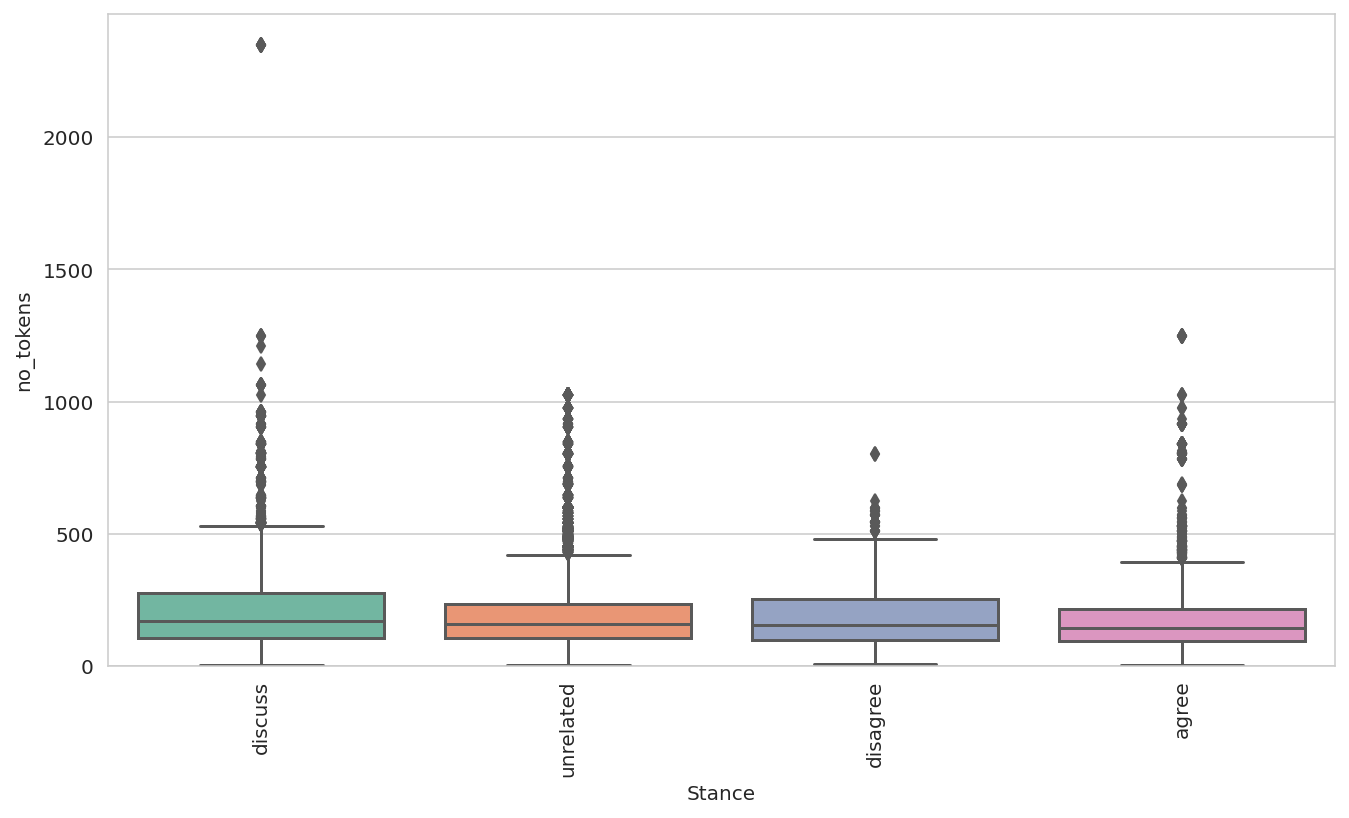

In [0]:
multi_boxplot(df, 'Stance', 'no_tokens');

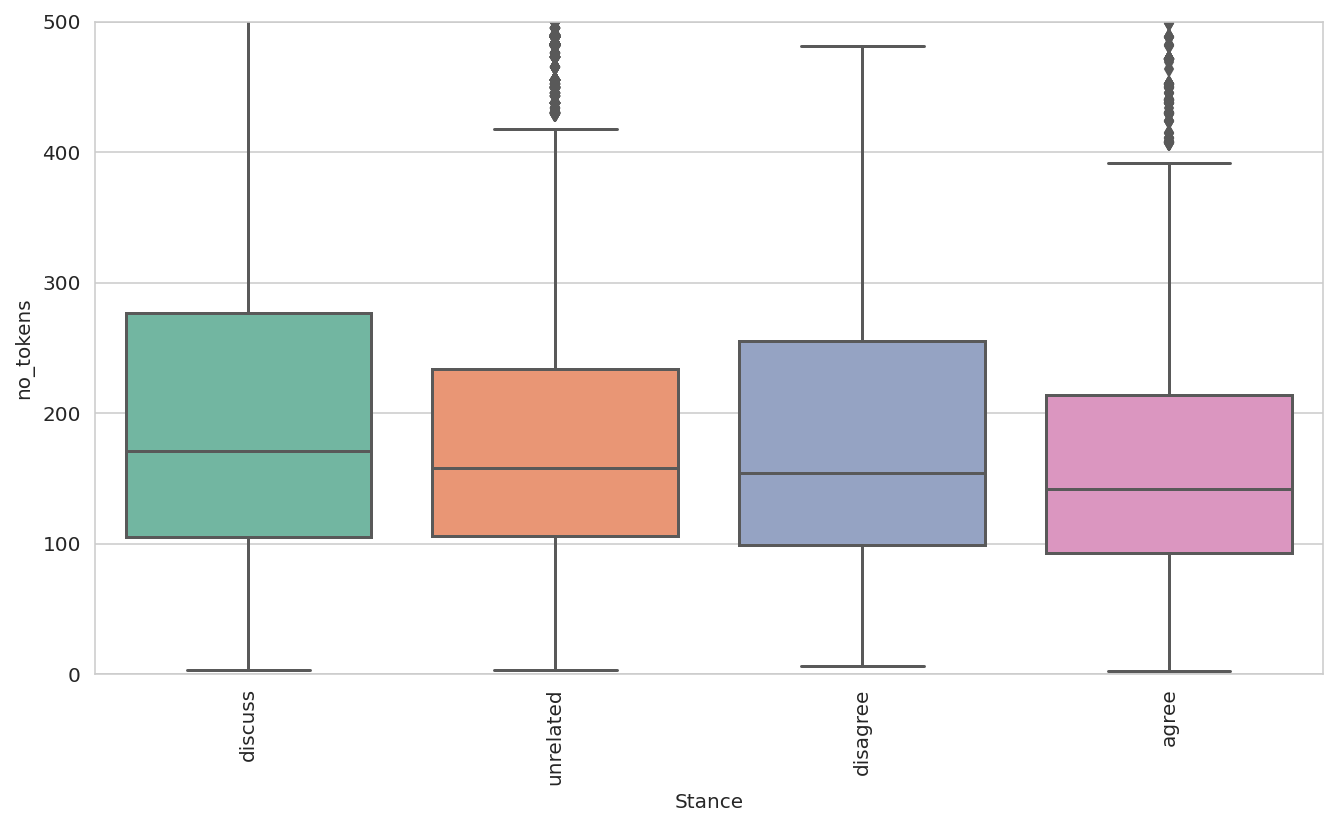

In [0]:
# cut-off diagram at y=500
multi_boxplot(df, 'Stance', 'no_tokens', ylim=500)

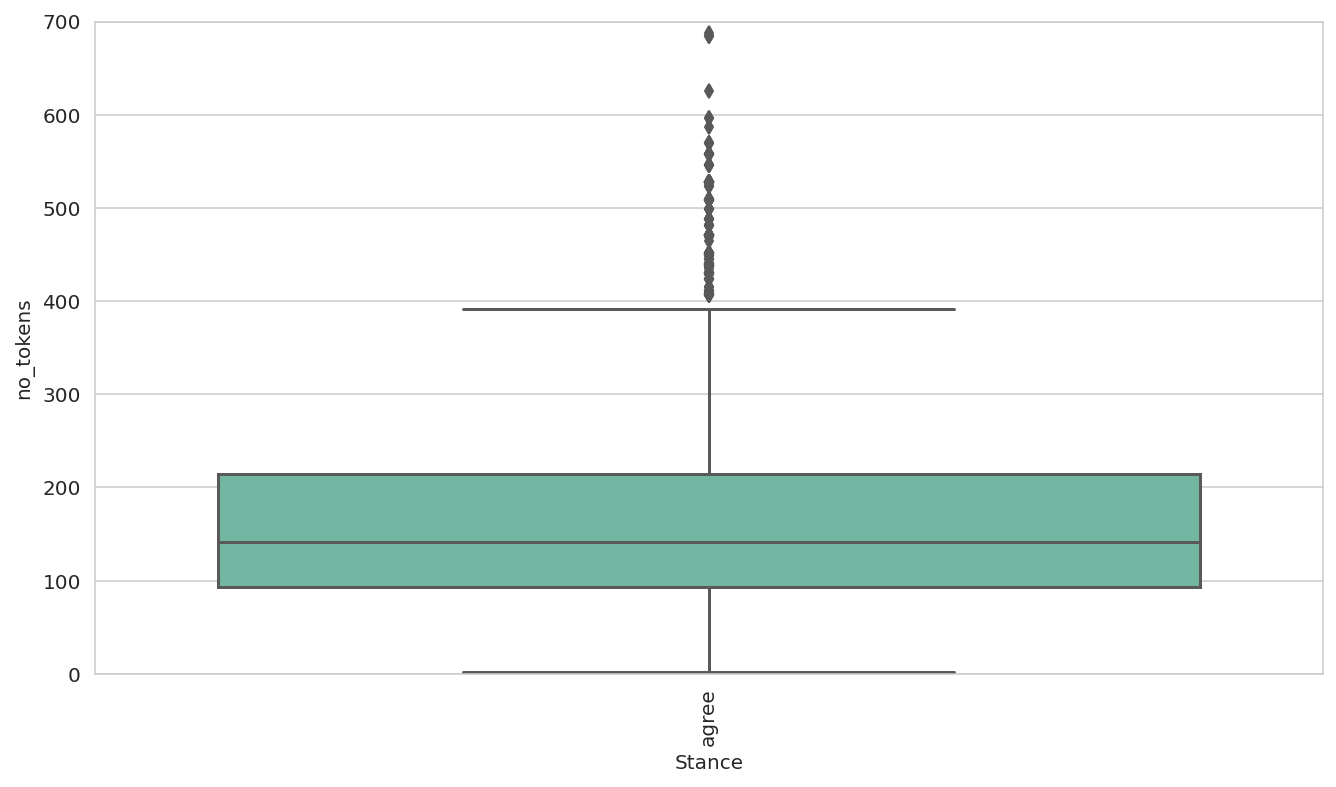

In [0]:
# comparing subreddits within a single category
multi_boxplot(df[df.Stance=='agree'], 
              'Stance', 'no_tokens', ylim=700)